In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('lbp.csv')
df_dates=pd.to_datetime(df['Date'])
cols = list(df)[1:10]
df1 = df[cols].astype(float)
# df1

In [14]:
df2=np.array(df1)
data = df2.reshape(28,4,9)
# data

In [15]:
train_data1, test_data1 = train_test_split(data, test_size=0.53, shuffle=False)
# train_data1.shape,test_data1.shape

In [16]:
train_data=train_data1[:,:,1:2]
train_data_o=train_data1[:,-1,-1].reshape(-1,1)
test_data=test_data1[:,:,1:2]
test_data_o=test_data1[:,-1,-1].reshape(-1,1)
train_data.shape,train_data_o.shape,test_data.shape,test_data_o.shape


((13, 4, 1), (13, 1), (15, 4, 1), (15, 1))

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1)).reshape(train_data.shape)
test_data = scaler.fit_transform(test_data.reshape(-1, 1)).reshape(test_data.shape)
train_data_o = scaler.fit_transform(train_data_o)
test_data_o = scaler.fit_transform(test_data_o)
train_data.shape,test_data.shape,train_data_o.shape,test_data_o.shape

((13, 4, 1), (15, 4, 1), (13, 1), (15, 1))

In [18]:
train_X = train_data[:, :,:]
train_y = train_data_o
test_X = test_data[:, :, :]
test_y = test_data_o

In [19]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# model.summary()


In [20]:
model.fit(train_X, train_y, epochs=25, batch_size=32, validation_data=(test_X, test_y), verbose=2)
# Make predictions on the test data
predictions = model.predict(test_X)
# predictions

Epoch 1/25
1/1 - 11s - loss: 0.5344 - val_loss: 0.4715 - 11s/epoch - 11s/step
Epoch 2/25
1/1 - 0s - loss: 0.5177 - val_loss: 0.4585 - 56ms/epoch - 56ms/step
Epoch 3/25
1/1 - 0s - loss: 0.5014 - val_loss: 0.4454 - 51ms/epoch - 51ms/step
Epoch 4/25
1/1 - 0s - loss: 0.4849 - val_loss: 0.4319 - 63ms/epoch - 63ms/step
Epoch 5/25
1/1 - 0s - loss: 0.4681 - val_loss: 0.4180 - 61ms/epoch - 61ms/step
Epoch 6/25
1/1 - 0s - loss: 0.4506 - val_loss: 0.4035 - 60ms/epoch - 60ms/step
Epoch 7/25
1/1 - 0s - loss: 0.4324 - val_loss: 0.3883 - 59ms/epoch - 59ms/step
Epoch 8/25
1/1 - 0s - loss: 0.4133 - val_loss: 0.3723 - 73ms/epoch - 73ms/step
Epoch 9/25
1/1 - 0s - loss: 0.3932 - val_loss: 0.3556 - 55ms/epoch - 55ms/step
Epoch 10/25
1/1 - 0s - loss: 0.3720 - val_loss: 0.3380 - 49ms/epoch - 49ms/step
Epoch 11/25
1/1 - 0s - loss: 0.3497 - val_loss: 0.3197 - 40ms/epoch - 40ms/step
Epoch 12/25
1/1 - 0s - loss: 0.3265 - val_loss: 0.3007 - 50ms/epoch - 50ms/step
Epoch 13/25
1/1 - 0s - loss: 0.3023 - val_loss: 0.

In [21]:
test_y_rescale=scaler.inverse_transform(test_y)
predictions_rescale=scaler.inverse_transform(predictions)
predictions_rescale,test_y_rescale

(array([[40.099632],
        [40.10193 ],
        [40.103302],
        [40.10472 ],
        [40.105217],
        [40.10422 ],
        [40.10596 ],
        [40.10779 ],
        [40.10419 ],
        [40.10452 ],
        [40.103996],
        [40.1095  ],
        [40.109478],
        [40.113937],
        [40.104454]], dtype=float32),
 array([[40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9]]))

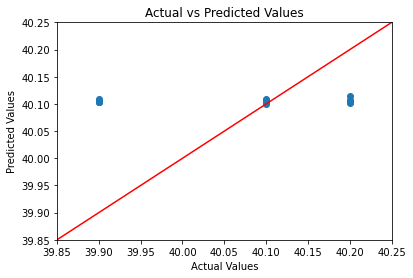

MSE:  0.01695465737546365
RMSE:  0.13021005097711794


In [22]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(test_y_rescale,predictions_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse = mean_squared_error(test_y_rescale,predictions_rescale)
rmse = np.sqrt(mse)
print("MSE: ",  mse)
print("RMSE: ", rmse)